# Analysis and Visualization of Kampala Houses Data

In this notebook, I perform basic analysis and visualization of data for houses in Kampala. I scraped this data from the [Jumia House](https://houses.jumia.ug). This website contains prices of houses and a few details about them. I specifically scraped data from Kampala. The code I used to scrape the website canbe found [here](#). The houses data can be found [here](#).

So I can now load the data and start the analysis

In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]


houses = pd.read_csv('.../clean_houses.csv')

print 'The shape of the dataset is {}'.format(houses.shape)
print
houses.head()

The shape of the dataset is (422, 7)



,Rooms,baths,bedrooms,land_size,living_area,locations,prices
0,8,4,4,1000,800,MUNYONYO,600000000
1,10,5,6,1000,100,KISAASI,800000000
2,9,3,4,1092,325,LUBOWA,968801143
3,6,5,6,1500,809,BUKESA,600000000
4,8,5,5,800,400,KAMPALA,700000000


The dataset contains 7 columns and 422 different examples. The 7 columns correspond to the features I found most useful and consistently available features I found on the Jumia Houses website.

Below we examine the relationship between the number of rooms and the house price using a swarmplot.

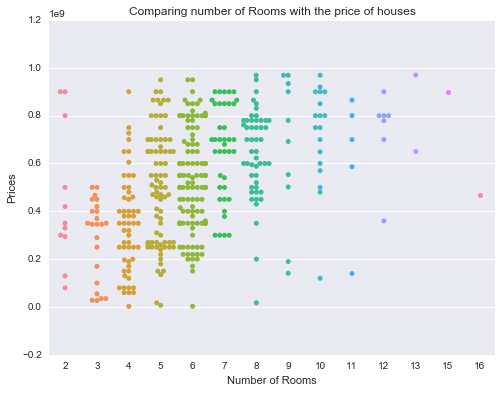

In [2]:
sns.swarmplot(x='Rooms', y='prices', data=houses);
plt.xlabel('Number of Rooms')
plt.ylabel('Prices')
plt.title('Comparing number of Rooms with the price of houses');

We can see there is a genral upward trend as the number of rooms increases. We can use one of seaborn's regression plots to examine this.

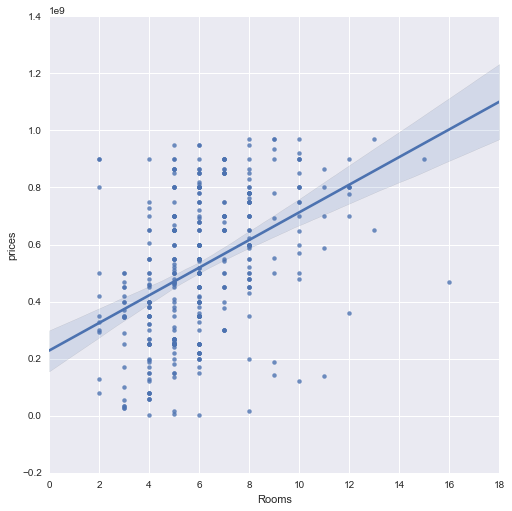

In [3]:
fig= plt.figure(figsize=(10,8));
sns.lmplot(x='Rooms', y='prices', data=houses, size= 7.2);

We can look at the numerical variables that are ordinal and examine their relationship with the price.

In [4]:
print list(houses.columns)

['Rooms', 'baths', 'bedrooms', 'land_size', 'living_area', 'locations', 'prices']


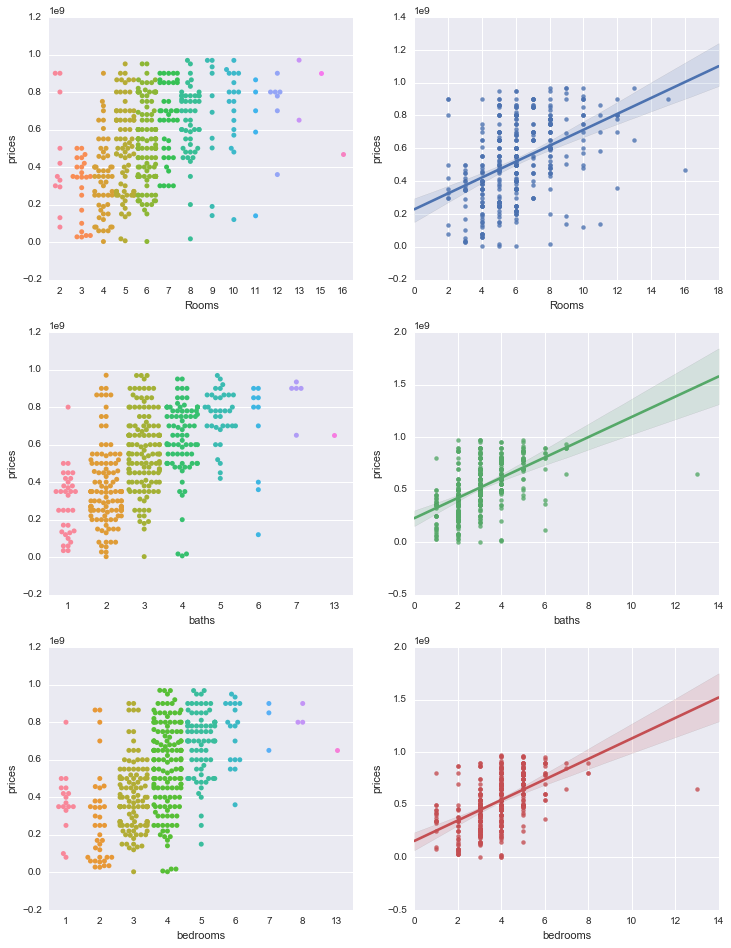

In [5]:
fig, ax = plt.subplots(3,2, figsize=(12,16));

for num, col in enumerate(['Rooms', 'baths', 'bedrooms']):
    sns.swarmplot(x=col, y='prices', data=houses, ax=ax[num][0]);
    sns.regplot(x=col, y='prices', data=houses,ax= ax[num][1]);



We see above that three variables have a similar upward trend and are well correlated with the price. I expect all them to also be correlated with each other( number of rooms, baths and bedrooms normally are).

We can also look at the relationship of the price with the land size below.

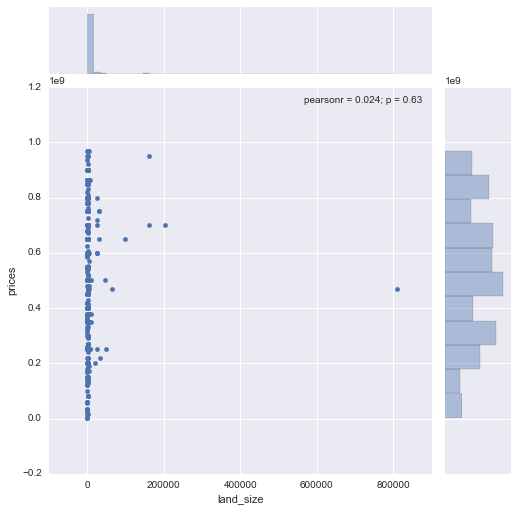

In [6]:
sns.jointplot(x='land_size', y='prices', data=houses, size= 7.2);

We can see above there are some huge outliers affecting the visualization of the rest of the data. We can reduce the land size shown on the graph to a limit of 3000 sq.metres, which is a little more realisitic as well.

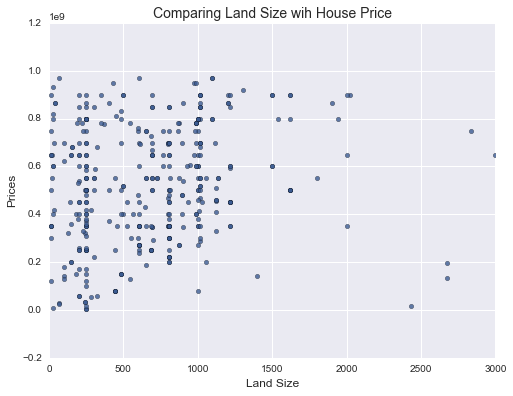

In [7]:
print
plt.scatter(houses['land_size'], houses['prices'], c=sns.xkcd_rgb['denim blue'], alpha=0.8);
plt.xlim(0,3000);
plt.xlabel('Land Size', fontsize=12);
plt.ylabel('Prices', fontsize=12)
plt.title('Comparing Land Size wih House Price', fontsize=14);

Alternatively, we could leave all the land size values and instead plot the log of he land size. This gives us a better plot. We also see that there is no discernible trend in this case as with the earlier variables.

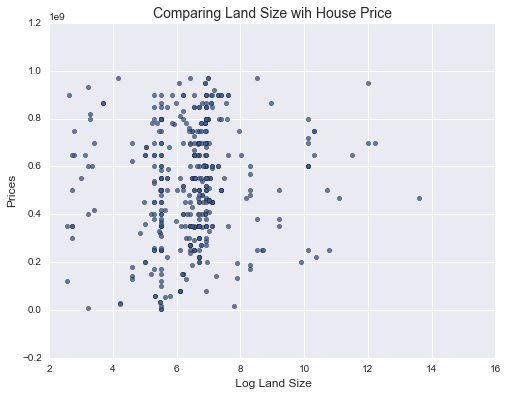

In [8]:
print
plt.scatter(np.log(houses['land_size']), houses['prices'], c=sns.xkcd_rgb['denim blue'], alpha=0.8);
plt.xlabel(' Log Land Size', fontsize=12);
plt.ylabel('Prices', fontsize=12)
plt.title('Comparing Land Size wih House Price', fontsize=14);

We can make a similar comparison of the Living Area and Price of the house. Again we see that the plot is afeected by huge outliers.

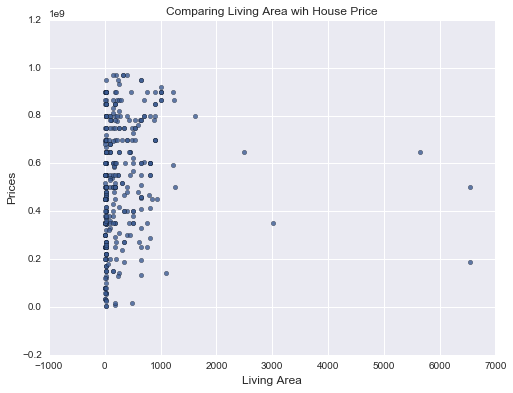

In [9]:
plt.scatter(houses['living_area'], houses['prices'], c=sns.xkcd_rgb['denim blue'], alpha=0.8);
plt.xlabel('Living Area', fontsize=12);
plt.ylabel('Prices', fontsize=12)
plt.title('Comparing Living Area wih House Price', fontsize=12);

We use a similar remedy as before and plot the living area on a log scale. Stil there is no discernible trend or correlation. 

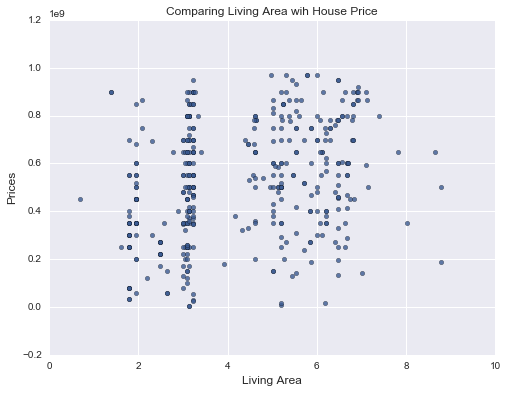

In [10]:
print
plt.scatter(np.log(houses['living_area']), houses['prices'], c=sns.xkcd_rgb['denim blue'], alpha=0.8);
plt.xlabel('Living Area', fontsize=12);
plt.ylabel('Prices', fontsize=12)
plt.title('Comparing Living Area wih House Price', fontsize=12);

We can then group the houses by their location and see how the prices are affected and move from one location to another.

In [11]:
#group houses by location
by_location = houses.groupby('locations', as_index=False)['locations', 'prices'].mean().sort_values(by='prices', ascending=False).reset_index(drop=True)

In [12]:
by_location.head()

,locations,prices
0,LUZIRA,9.000000e+08
1,WAVAMUNNO,8.500000e+08
2,MENGO,8.000000e+08
3,KYAMBOGO,8.000000e+08
4,NAGURU,7.941502e+08


In [13]:
#include a rank of the houses by orice
by_location['rank'] = by_location['prices'].rank(ascending=False)

In [14]:
by_location.head()

,locations,prices,rank
0,LUZIRA,9.000000e+08,1.0
1,WAVAMUNNO,8.500000e+08,2.0
2,MENGO,8.000000e+08,3.5
3,KYAMBOGO,8.000000e+08,3.5
4,NAGURU,7.941502e+08,5.0


We can now plot a bar graph of the most expensive house locations. Many of the areas shown are not suprising save for a few exceptions. Given the small data size, these are to be expected.

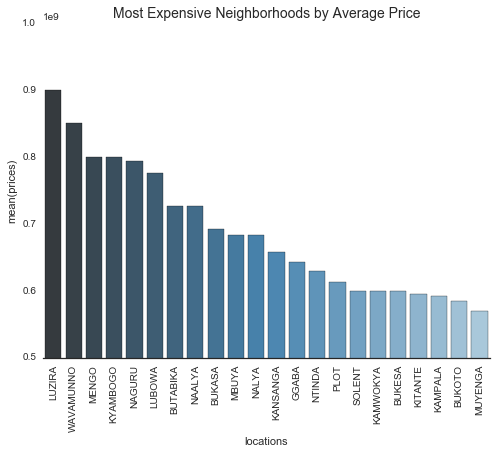

In [15]:
with sns.axes_style("white"):
    print
    sns.barplot(x='locations', y='prices', data=by_location.head(22), palette='Blues_d');
    plt.xticks(rotation=90);
    plt.ylim(5e8,10e8);
    sns.despine(left=True);
    plt.title('Most Expensive Neighborhoods by Average Price', fontsize=14);

We also include a pot for the least expensive locations. Again, there are few surprises here.

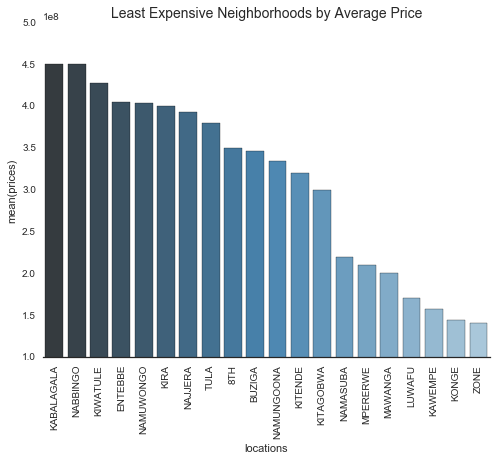

In [16]:
with sns.axes_style("white"): 
    print
    sns.barplot(x='locations', y='prices', data=by_location.tail(20), palette='Blues_d');
    plt.xticks(rotation=90);
    plt.ylim(1e8,5e8);
    sns.despine(left=True);
    plt.title('Least Expensive Neighborhoods by Average Price', fontsize=14);

Let us include a column for the number of houses per location so that we can see which areas have their means based on a small sample size (explaining the surprises in the graphs above).

In [17]:
num_locations = houses['locations'].value_counts(); #getting the house counts per location
num_df = pd.DataFrame({'locations':list(num_locations.index),'counts':list(num_locations.values)})

In [18]:
combined = pd.merge(by_location, num_df, on='locations') #combining the house counts ith the previous location dataframe
combined.head()

,locations,prices,rank,counts
0,LUZIRA,9.000000e+08,1.0,2
1,WAVAMUNNO,8.500000e+08,2.0,1
2,MENGO,8.000000e+08,3.5,1
3,KYAMBOGO,8.000000e+08,3.5,1
4,NAGURU,7.941502e+08,5.0,4


We can then make a bubble plot that shows the different house locations, and their mean prices. The size of the bubble corresponds to how many houses the plot is based on.

The first plot is for the most expensive houses.

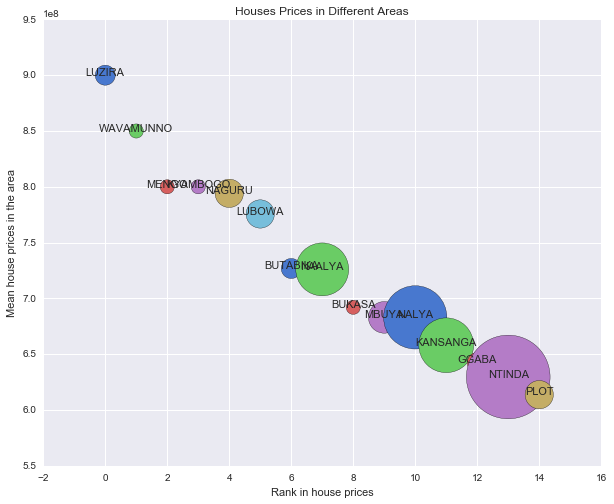

In [19]:
colors = sns.color_palette(palette='muted', n_colors=10)
fig, ax = plt.subplots(figsize=(10,8));
plt.scatter(x= range(15), y=combined['prices'].head(15), s = (200*combined['counts'].head(15)), c=colors);
for line in combined.head(15).itertuples():
    plt.text(line[0], line[2],line[1], horizontalalignment='center', size=11);
plt.xlabel('Rank in house prices');
plt.ylabel('Mean house prices in the area');
plt.title('Houses Prices in Different Areas');


We make a similar plot for the least expensive houses.

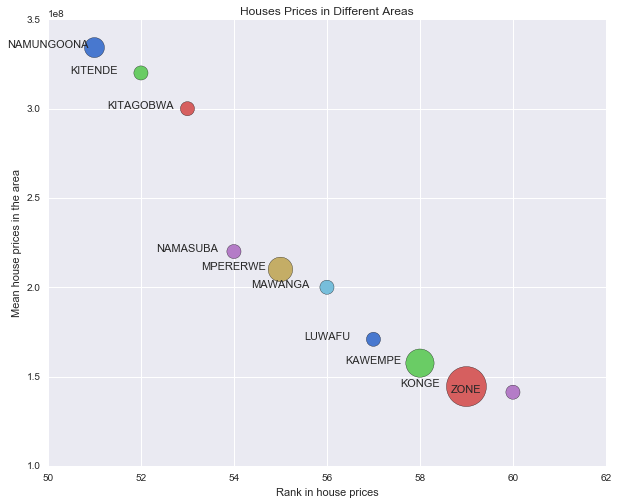

In [20]:
fig, ax = plt.subplots(figsize=(10,8));
plt.scatter(x= combined['rank'].tail(10), y=combined['prices'].tail(10), s = (200*combined['counts'].tail(10)), c=colors);
for line in combined.tail(10).itertuples():
    plt.text(line[0], line[2],line[1], horizontalalignment='center', size=11);
plt.xlabel('Rank in house prices');
plt.ylabel('Mean house prices in the area');
plt.title('Houses Prices in Different Areas');

Finally we make a heat map that shos the correlations of the different variables.

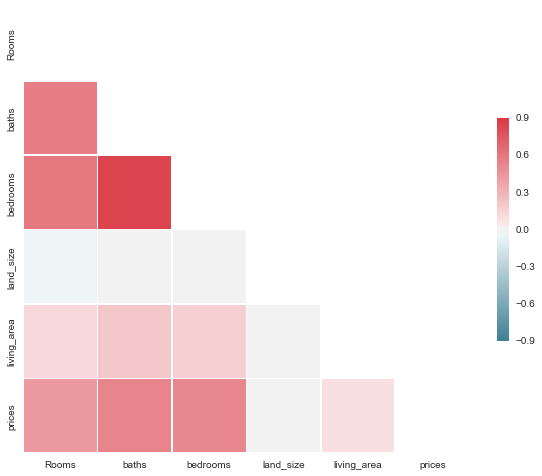

In [21]:
sns.set_style("white");
houses_corr = houses.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)

mask = np.zeros_like(houses_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(houses_corr, mask=mask, cmap=cmap,vmax=.9, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .5});

Some of what we saw earlier is exhinited in this heat map. For example, land size and living area barely have a correlation with the price while nuber of rroms, bedrooms and baths are well correlated with the price as well as themselves.